## 다중회귀 - 보스톤 주택 가격


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import warnings 
warnings.filterwarnings("ignore")

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()

In [10]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df["PRICE"] = boston.target

In [11]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


- Feature 별 산점도와 선형회귀선

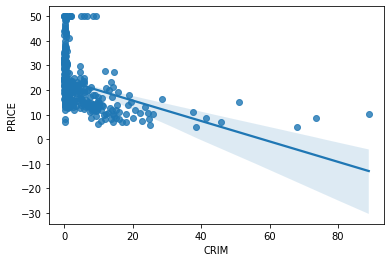

In [14]:
sns.regplot(df["CRIM"], df["PRICE"], data = df);

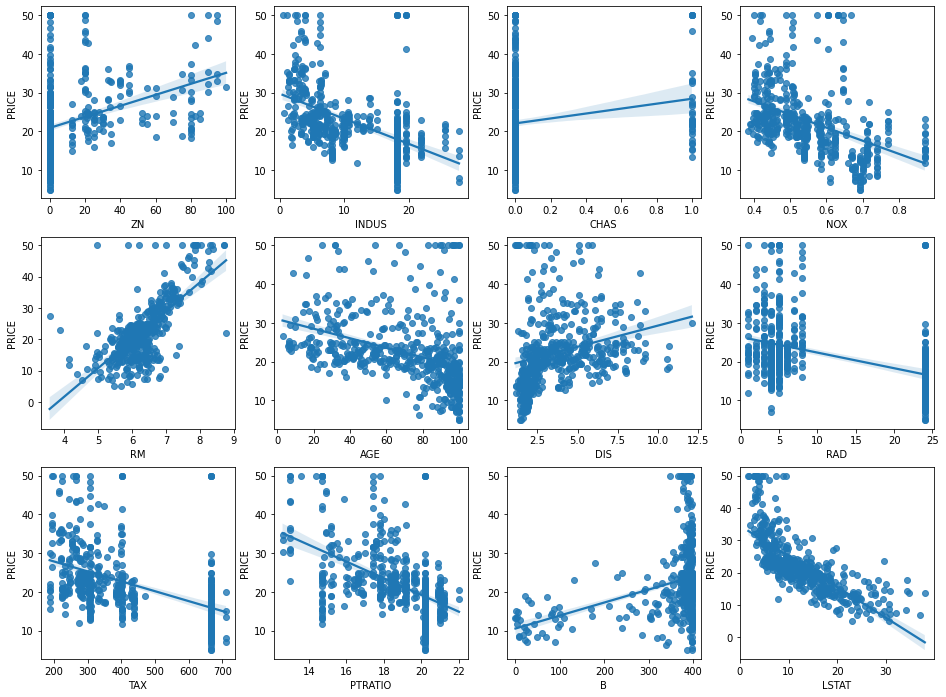

In [17]:
_, axs = plt.subplots(3,4, figsize = (16,12)) # seaborn 은 subplots를 붙이고 matplotlib를 쓸 땐 subplot 을 붙인다
for i, feature in enumerate(df.columns[1:-1]):
  row, col = i // 4, i % 4
  sns.regplot(df[feature], df["PRICE"], data = df, ax = axs[row][col])

- Feature별 결정계수(R squared)

In [18]:
from sklearn.linear_model import LinearRegression

In [21]:
for feature in df.columns[:-1]:
  lr = LinearRegression()
  X = df[feature].values.reshape(-1,1)
  lr.fit(X, boston.target)
  score = lr.score(X, boston.target)
  print(f"{feature}:\t{score : .4f}")

CRIM:	 0.1508
ZN:	 0.1299
INDUS:	 0.2340
CHAS:	 0.0307
NOX:	 0.1826
RM:	 0.4835
AGE:	 0.1421
DIS:	 0.0625
RAD:	 0.1456
TAX:	 0.2195
PTRATIO:	 0.2578
B:	 0.1112
LSTAT:	 0.5441


### 다중 선형회귀

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state = 1018, test_size = 0.1
)

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)       

LinearRegression()

In [29]:
# R-squared
lr.score(X_train, y_train)

0.7311079431197458

In [30]:
# 계수, weight
lr.coef_

array([-9.65409568e-02,  5.06170200e-02,  2.61944055e-02,  2.99813335e+00,
       -1.92379445e+01,  3.59945954e+00, -5.05864545e-03, -1.59792214e+00,
        2.95265389e-01, -1.13986493e-02, -9.44431220e-01,  8.54610624e-03,
       -5.32169810e-01])

In [31]:
# 절편, bias
lr.intercept_

39.255877078634114

- 회귀식
<pre>
y = -9.65 * CRIM + 5.06 * ZN + 2.61 * INDUS + 2.99 + ... 

In [32]:
X_test[0], y_test[0]

(array([1.0574e-01, 0.0000e+00, 2.7740e+01, 0.0000e+00, 6.0900e-01,
        5.9830e+00, 9.8800e+01, 1.8681e+00, 4.0000e+00, 7.1100e+02,
        2.0100e+01, 3.9011e+02, 1.8070e+01]), 13.6)

In [34]:
# Weight와 bias를 이용하여 직접 구한 값
np.dot(lr.coef_, X_test[0]) + lr.intercept_

14.118254804381827

In [37]:
# predict method
lr.predict(X_test[0].reshape(1,-1))  # lr.predict(X_test[:1])  -> 슬라이싱을 하면 2차원으로 나온다

array([14.1182548])

In [44]:
# 10개 테스트에 대해 적용
for i in range(10):
  pred1 = np.dot(lr.coef_, X_test[i]) + lr.intercept_
  pred2 = lr.predict(X_test[i].reshape(1, -1))
  print(f"실제값: {y_test[i]},\t직접계산 예측값: {pred1:.4f},\tLR 예측값: {pred2[0]: .4f}")


실제값: 13.6,	직접계산 예측값: 14.1183,	LR 예측값:  14.1183
실제값: 19.3,	직접계산 예측값: 17.3082,	LR 예측값:  17.3082
실제값: 22.9,	직접계산 예측값: 20.2220,	LR 예측값:  20.2220
실제값: 10.4,	직접계산 예측값: 15.2348,	LR 예측값:  15.2348
실제값: 17.1,	직접계산 예측값: 20.1622,	LR 예측값:  20.1622
실제값: 19.4,	직접계산 예측값: 23.2064,	LR 예측값:  23.2064
실제값: 13.5,	직접계산 예측값: 13.5540,	LR 예측값:  13.5540
실제값: 21.9,	직접계산 예측값: 24.0223,	LR 예측값:  24.0223
실제값: 41.7,	직접계산 예측값: 37.5267,	LR 예측값:  37.5267
실제값: 33.2,	직접계산 예측값: 35.8677,	LR 예측값:  35.8677


### 회귀는 꼭 선형회귀를 써야 하는가?
- Linear Regression, 결정트리, SVM, RandomForest, XGBoost

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

#### 1. Linear Regression

In [65]:
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)

#### 2. Decision Tree Regression

In [66]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 2022)
dtr.fit(X_train, y_train)

pred_dtr = dtr.predict(X_test)
r2_dtr = r2_score(y_test, pred_dtr)
mse_dtr = mean_squared_error(y_test, pred_dtr)

#### Support Vector Machine - Support Vector Regression

In [67]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

pred_svr = svr.predict(X_test)
r2_svr = r2_score(y_test, pred_svr)
mse_svr = mean_squared_error(y_test, pred_svr)

#### Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

pred_rfr = svr.predict(X_test)
r2_rfr = r2_score(y_test, pred_rfr)
mse_rfr = mean_squared_error(y_test, pred_rfr)

#### 5. XGBoost - XGBRegressor

In [69]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

pred_xgb = svr.predict(X_test)
r2_xgb = r2_score(y_test, pred_xgb)
mse_xgb = mean_squared_error(y_test, pred_xgb)

[01:19:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [70]:
print(f'LR\tDT\tSVM\tRF\tXGB')
print(f'{r2_lr:.4f}\t{r2_dtr:.4f}\t{r2_svr:.4f}\t{r2_rfr:.4f}\t{r2_xgb:.4f}')
print(f'{mse_lr:.4f}\t{mse_dtr:.4f}\t{mse_svr:.4f}\t{mse_rfr:.4f}\t{mse_xgb:.4f}')


LR	DT	SVM	RF	XGB
0.8286	0.8596	0.3328	0.3328	0.3328
12.1535	9.9531	47.3151	47.3151	47.3151


In [73]:
df = pd.DataFrame({
    'y_test' : y_test, "LR":pred_lr, "DT" : pred_dtr, "SVM" : pred_svr, "RF" : pred_rfr, "XGB" : pred_xgb
})
df.head()

,y_test,LR,DT,SVM,RF,XGB
0,13.6,14.118255,15.2,15.684816,15.684816,15.684816
1,19.3,17.308221,22.5,22.565298,22.565298,22.565298
2,22.9,20.222021,23.2,22.909287,22.909287,22.909287
3,10.4,15.234841,15.0,15.932870,15.932870,15.932870
4,17.1,20.162249,19.3,23.601575,23.601575,23.601575


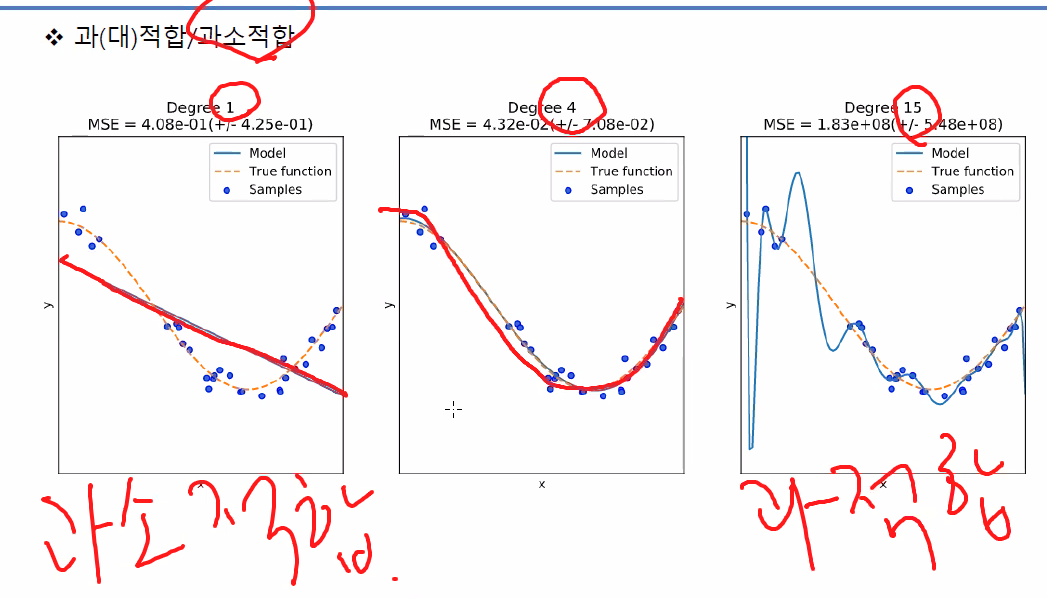

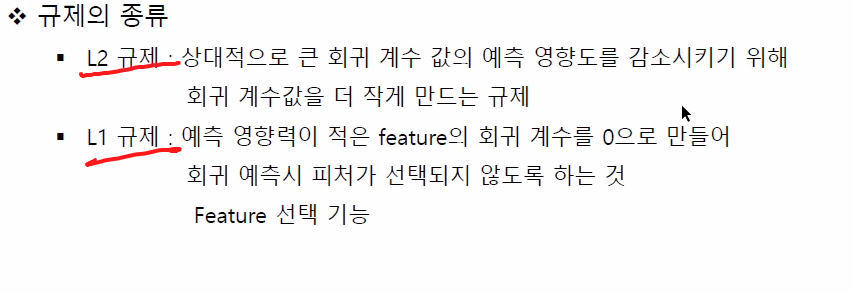

In [74]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet